# **Librerias**

In [ ]:
# Librerias

import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import Series
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
#from math import sqrt
from numpy import concatenate

import seaborn as sns

# Librerias para evaluación 

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Librerias para construir los modelos

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


: 

# Analisis exploratorio

In [3]:
dfLecturas = pd.read_csv('Glucose Level - T1D - FreeStyle Libre.csv',dtype={"ID":"string","Glucose level":int},parse_dates=True)

In [4]:
dfLecturas.shape

(3000001, 3)

In [5]:
dfLecturas.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99
1,LIB193263,2020-06-09 19:23:00,92
2,LIB193263,2020-06-09 19:38:00,86
3,LIB193263,2020-06-09 19:53:00,85
4,LIB193263,2020-06-09 20:08:00,85


In [6]:
dfLecturas.tail()

,ID,Date,Glucose level
2999996,LIB193399,2020-10-20 20:50:00,83
2999997,LIB193399,2020-10-20 21:05:00,76
2999998,LIB193399,2020-10-20 21:20:00,67
2999999,LIB193399,2020-10-20 21:35:00,63
3000000,LIB193399,2020-10-20 21:50:00,63


In [7]:
dfLecturas.dtypes

ID               string
Date             object
Glucose level     int64
dtype: object

In [8]:
print(dfLecturas["ID"].unique())

<StringArray>
['LIB193263', 'LIB193264', 'LIB193265', 'LIB193266', 'LIB193267', 'LIB193268',
 'LIB193269', 'LIB193270', 'LIB193271', 'LIB193272',
 ...
 'LIB193389', 'LIB193390', 'LIB193391', 'LIB193392', 'LIB193393', 'LIB193395',
 'LIB193396', 'LIB193397', 'LIB193398', 'LIB193399']
Length: 108, dtype: string


In [9]:
dfLecturas['Date'] =  pd.to_datetime(dfLecturas['Date'])

In [10]:
dfLecturas.dtypes

ID                       string
Date             datetime64[ns]
Glucose level             int64
dtype: object

In [11]:
dfLecturas.isnull().sum()

ID               0
Date             0
Glucose level    0
dtype: int64

In [12]:
print(pd.to_datetime(dfLecturas['Date'],errors='coerce'))

0         2020-06-09 19:08:00
1         2020-06-09 19:23:00
2         2020-06-09 19:38:00
3         2020-06-09 19:53:00
4         2020-06-09 20:08:00
                  ...        
2999996   2020-10-20 20:50:00
2999997   2020-10-20 21:05:00
2999998   2020-10-20 21:20:00
2999999   2020-10-20 21:35:00
3000000   2020-10-20 21:50:00
Name: Date, Length: 3000001, dtype: datetime64[ns]


In [13]:
dfLecturas['Date'].agg(['min', 'max'])

min   2016-10-05 08:47:00
max   2044-03-22 03:44:00
Name: Date, dtype: datetime64[ns]

In [14]:
indexAge = dfLecturas[ (dfLecturas['Date']<'2018-01-06 00:00:00') ].index
dfLecturas.drop(indexAge , inplace=True)

In [15]:
indexAge = dfLecturas[ (dfLecturas['Date']>'2022-03-21 00:00:00') ].index
dfLecturas.drop(indexAge , inplace=True)

In [16]:
dfLecturas['Date'].agg(['min', 'max'])

min   2018-01-06 00:31:00
max   2022-03-20 23:58:00
Name: Date, dtype: datetime64[ns]

In [17]:
dfLecturas.shape

(2969680, 3)

In [18]:
df_sort = dfLecturas.pivot_table(columns=['ID'], aggfunc='size')
df_sort.sort_values()

ID
LIB193321         2
LIB193365      1057
LIB193283      1098
LIB193398      1253
LIB193366      1287
              ...  
LIB193367     76925
LIB193309     77289
LIB193307    104058
LIB193385    114107
LIB193277    114598
Length: 108, dtype: int64

Analisis exploratorio


Estos parecen los que tienen mas registros

LIB193310     (71772) 

*   LIB193310	2020-02-13 17:54:00	2022-03-18 16:54:00

LIB193269     (71881)
* LIB193269	2019-02-13 06:36:00	2022-03-17 17:32:00

LIB193367     (76925)
* LIB193367	2020-01-27 18:51:00	2022-03-15 12:46:00

LIB193309     (77289)
* LIB193309	2018-07-12 12:19:00	2022-03-17 08:50:00

LIB193307    (104058)
* LIB193307	2018-11-04 21:10:00	2022-03-17 20:14:00

LIB193385    (114107)
* LIB193385	2018-02-21 19:46:00	2022-03-18 09:43:00

LIB193277    (114598)
* LIB193277	2018-06-12 20:18:00	2022-03-18 11:59:00

In [19]:
dfLecturas.groupby('ID')['Date'].agg([('Start_Date', 'min'), ('End_Date', 'max')])

,Start_Date,End_Date
ID,,
LIB193263,2020-06-09 19:08:00,2022-03-19 07:32:00
LIB193264,2020-06-10 00:54:00,2022-03-19 11:56:00
LIB193265,2019-01-27 10:52:00,2022-03-19 22:04:00
LIB193266,2020-10-08 18:03:00,2022-03-17 18:22:00
LIB193267,2020-06-09 19:07:00,2022-03-17 20:15:00
...,...,...
LIB193395,2018-08-19 09:24:00,2022-02-04 09:40:00
LIB193396,2021-06-16 11:20:00,2021-07-22 10:56:00
LIB193397,2018-06-06 11:38:00,2022-02-28 11:44:00


In [20]:
dfLecturas.shape

(2969680, 3)

## Variables a partir de la fecha

In [21]:
dfPrimerEscenario = dfLecturas.copy()
dfSegundoEscenario = dfLecturas.copy()

def estacionMetereologica(date):
    ''' date -> datetime object  '''
    md = pd.to_datetime(date).month * 100 + pd.to_datetime(date).day

    if ((md > 320) and (md < 621)):
        s = 'Primavera' #primavera
    elif ((md > 620) and (md < 923)):
        s = 'Verano' #verano
    elif ((md > 922) and (md < 1223)):
        s = 'Otono' #otoño 
    else:
        s = 'Invierno' #invierno
    return s

def momentoDelDia(time):
    if (time>=0) & (time<6):
        tod = 'Madrugada' #madrugada'
    elif (time>=6) & (time<12):
        tod = 'Manana' #manana
    elif (time>=12) & (time<18):
        tod = 'Tarde' #tarde
    else:
        tod = 'Noche' #noche
    return tod

dfSegundoEscenario['Estacion'] = dfSegundoEscenario.Date.map(estacionMetereologica)
dfSegundoEscenario['MomentoDia'] = dfSegundoEscenario.Date.dt.hour.map(momentoDelDia) 
dfSegundoEscenario['DiaSemana'] = pd.to_datetime(dfSegundoEscenario.Date).dt.strftime('%A')
dfSegundoEscenario['Mes'] = pd.to_datetime(dfSegundoEscenario.Date).dt.strftime('%b')
dfSegundoEscenario.head()

,ID,Date,Glucose level,Estacion,MomentoDia,DiaSemana,Mes
0,LIB193263,2020-06-09 19:08:00,99,Primavera,Noche,Tuesday,Jun
1,LIB193263,2020-06-09 19:23:00,92,Primavera,Noche,Tuesday,Jun
2,LIB193263,2020-06-09 19:38:00,86,Primavera,Noche,Tuesday,Jun
3,LIB193263,2020-06-09 19:53:00,85,Primavera,Noche,Tuesday,Jun
4,LIB193263,2020-06-09 20:08:00,85,Primavera,Noche,Tuesday,Jun


In [22]:
#dfSegundoEscenario['DiaSemana'] = dfSegundoEscenario['DiaSemana'].astype(np.int64)
#dfSegundoEscenario['Mes'] = dfSegundoEscenario['Mes'].astype(np.int64)

In [23]:
dfSegundoEscenario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969680 entries, 0 to 3000000
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             string        
 1   Date           datetime64[ns]
 2   Glucose level  int64         
 3   Estacion       object        
 4   MomentoDia     object        
 5   DiaSemana      object        
 6   Mes            object        
dtypes: datetime64[ns](1), int64(1), object(4), string(1)
memory usage: 181.3+ MB


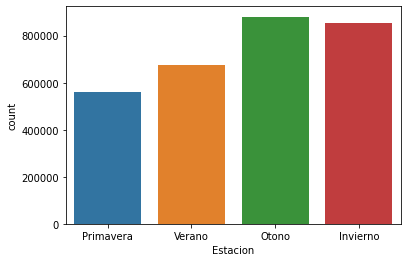

In [24]:
sns.countplot(x=dfSegundoEscenario.Estacion)

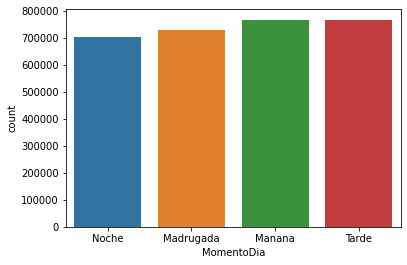

In [25]:
sns.countplot(x=dfSegundoEscenario.MomentoDia)

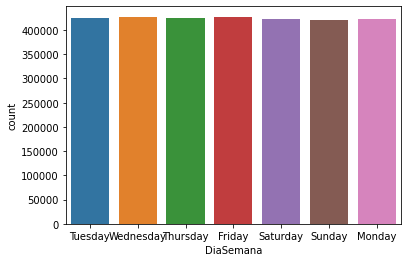

In [26]:
sns.countplot(x=dfSegundoEscenario.DiaSemana)

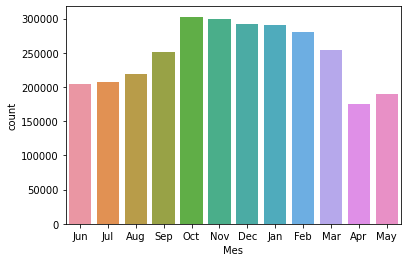

In [27]:
sns.countplot(x=dfSegundoEscenario.Mes)

In [28]:
dfSegundoEscenario

,ID,Date,Glucose level,Estacion,MomentoDia,DiaSemana,Mes
0,LIB193263,2020-06-09 19:08:00,99,Primavera,Noche,Tuesday,Jun
1,LIB193263,2020-06-09 19:23:00,92,Primavera,Noche,Tuesday,Jun
2,LIB193263,2020-06-09 19:38:00,86,Primavera,Noche,Tuesday,Jun
3,LIB193263,2020-06-09 19:53:00,85,Primavera,Noche,Tuesday,Jun
4,LIB193263,2020-06-09 20:08:00,85,Primavera,Noche,Tuesday,Jun
...,...,...,...,...,...,...,...
2999996,LIB193399,2020-10-20 20:50:00,83,Otono,Noche,Tuesday,Oct
2999997,LIB193399,2020-10-20 21:05:00,76,Otono,Noche,Tuesday,Oct
2999998,LIB193399,2020-10-20 21:20:00,67,Otono,Noche,Tuesday,Oct
2999999,LIB193399,2020-10-20 21:35:00,63,Otono,Noche,Tuesday,Oct


# **Modelos RN**

In [39]:
def lstmModel(X_train, y_train,WT,WP):
  Model_P = Sequential()
  Model_P.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1)))
  Model_P.add(Dropout(0.2))
  Model_P.add(LSTM(units = 60, return_sequences = True))
  Model_P.add(Dropout(0.2))
  Model_P.add(LSTM(units = 60, return_sequences = True))
  Model_P.add(Dropout(0.2))
  Model_P.add(LSTM(units = 60))
  Model_P.add(Dropout(0.2))
  Model_P.add(Dense(units = 1))
  Model_P.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model_P.fit(X_train, y_train, epochs = 30, batch_size = 32)
  plt.plot(range(len(Model_P.history.history['loss'])),Model_P.history.history['loss'] )
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()

  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,1))

  for i in range(WP):      
      First_Pred = Model_P.predict(Batch_New)[0]      
      prediction_test.append(First_Pred)      
      Batch_New = np.append(Batch_New[:,1:,:], [[First_Pred]], axis = 1)      

  prediction_test = np.array(prediction_test)
  predictions = sc.inverse_transform(prediction_test)

  plt.plot(test_set, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(test_set, predictions))
  Rsquare = r2_score(test_set, predictions)
  print (f'RMSE-->{RMSE} Rsquare-->{Rsquare}\n')

def lstmBidirectionalModel(X_train, y_train,WT,WP):
  Model_P = Sequential()
  Model_P.add(Bidirectional(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1))))
  Model_P.add(Dropout(0.2))
  Model_P.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model_P.add(Dropout(0.2))
  Model_P.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model_P.add(Dropout(0.2))
  Model_P.add(Bidirectional(LSTM(units = 60)))
  Model_P.add(Dropout(0.2))
  Model_P.add(Dense(units = 1))
  Model_P.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model_P.fit(X_train, y_train, epochs = 30, batch_size = 32)  
  plt.plot(range(len(Model_P.history.history['loss'])),Model_P.history.history['loss'] )
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()

  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,1))

  for i in range(WP):    
      First_Pred = Model_P.predict(Batch_New)[0]    
      prediction_test.append(First_Pred)    
      Batch_New = np.append(Batch_New[:,1:,:], [[First_Pred]], axis = 1)    

  prediction_test = np.array(prediction_test)
  predictions = sc.inverse_transform(prediction_test)

  plt.plot(test_set, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(test_set, predictions))
  Rsquare = r2_score(test_set, predictions)
  print (f'RMSE-->{RMSE} Rsquare-->{Rsquare}\n')

In [40]:
def mean_absolute_percentage_error (y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

def lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP):
  Model = Sequential()
  Model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 5)))
  Model.add(Dropout(0.2))
  Model.add(LSTM(units = 60, return_sequences = True))
  Model.add(Dropout(0.2))
  Model.add(LSTM(units = 60, return_sequences = True))
  Model.add(Dropout(0.2))
  Model.add(LSTM(units = 60))
  Model.add(Dropout(0.2))
  Model.add(Dense(units = 1))
  Model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model.fit(X_train,y_train, epochs = 30, batch_size = 32)

  plt.plot(range(len(Model.history.history['loss'])), Model.history.history['loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()
  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,5))

  for i in range(WP):    
      First_pred = Model.predict(Batch_New)[0]   
      #print (First_pred) 
      prediction_test.append(First_pred)        
      New_var = test_set_scaled[i,:]    
      New_var = New_var.reshape(1,-1)    
      New_test = np.insert(New_var, -1, [First_pred], axis =1)    
      New_test = New_test.reshape(1,1,-1)    
      Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)    
  prediction_test = np.array(prediction_test)

  SI = MinMaxScaler(feature_range = (0,1))
  y_Scale = training_set[:,4:5]
  SI.fit_transform(y_Scale)

  predictions = SI.inverse_transform(prediction_test)
  real_values = test_set[:, 4]

  plt.plot(real_values, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(real_values,predictions))
  MAPE = mean_absolute_percentage_error(real_values,predictions)
  print (f'MAPE-->{MAPE} RMSE-->{RMSE}\n')

def lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP):
  Model = Sequential()
  Model.add(Bidirectional(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 5))))
  Model.add(Dropout(0.2))
  Model.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model.add(Dropout(0.2))
  Model.add(Bidirectional(LSTM(units = 60, return_sequences = True)))
  Model.add(Dropout(0.2))
  Model.add(Bidirectional(LSTM(units = 60)))
  Model.add(Dropout(0.2))
  Model.add(Dense(units = 1))
  Model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  Model.fit(X_train,y_train, epochs = 30, batch_size = 32)

  plt.plot(range(len(Model.history.history['loss'])), Model.history.history['loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.show()

  prediction_test = []

  Batch_one = training_set_scaled[-WT:]
  Batch_New = Batch_one.reshape((1,WT,5))

  for i in range(WP):    
      First_pred = Model.predict(Batch_New)[0]   
      #print (First_pred) 
      prediction_test.append(First_pred)        
      New_var = test_set_scaled[i,:]    
      New_var = New_var.reshape(1,-1)    
      New_test = np.insert(New_var, -1, [First_pred], axis =1)    
      New_test = New_test.reshape(1,1,-1)    
      Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)    
  prediction_test = np.array(prediction_test)

  SI = MinMaxScaler(feature_range = (0,1))
  y_Scale = training_set[:,4:5]
  SI.fit_transform(y_Scale)

  predictions = SI.inverse_transform(prediction_test)
  real_values = test_set[:, 4]

  plt.plot(real_values, color = 'red', label = 'Valor actual')
  plt.plot(predictions, color = 'blue', label = 'Valor predicho')
  plt.title('Predicción de nivel de glucosa')
  plt.xlabel('Hora (intervalos 15 min)')
  plt.ylabel('Nivel de glucosa')
  plt.legend()
  plt.show()

  RMSE = math.sqrt(mean_squared_error(real_values,predictions))
  MAPE = mean_absolute_percentage_error(real_values,predictions)
  print (f'MAPE-->{MAPE} RMSE-->{RMSE}\n')

# **LIB193310 Primer escenario**


####**Primer escenario 2 horas**

In [32]:
dfLIB193310 = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193310'])].index
dfLIB193310.drop(indexAge , inplace=True)
indexAge = dfLIB193310[ (dfLIB193310['Date']<'2021-01-01 00:00:00') ].index
dfLIB193310.drop(indexAge , inplace=True)

indexAge = dfLIB193310[ (dfLIB193310['Date']>'2022-01-01 02:00:00') ].index
dfLIB193310.drop(indexAge , inplace=True)

dfLIB193310.drop('ID', inplace=True, axis=1)
dfLIB193310

,Date,Glucose level
994986,2021-01-01 00:12:00,172
994987,2021-01-01 00:27:00,166
994988,2021-01-01 00:42:00,159
994989,2021-01-01 00:57:00,143
994990,2021-01-01 01:12:00,127
...,...,...
1029285,2022-01-01 00:51:00,203
1029286,2022-01-01 01:05:00,210
1029287,2022-01-01 01:20:00,215
1029288,2022-01-01 01:35:00,211


Epoch 1/30
1072/1072 [==============================] - 22s 10ms/step - loss: 0.0088
Epoch 2/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0022
Epoch 3/30
1072/1072 [==============================] - 11s 11ms/step - loss: 0.0018
Epoch 4/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0016
Epoch 5/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0015
Epoch 6/30
1072/1072 [==============================] - 12s 11ms/step - loss: 0.0015
Epoch 7/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0014
Epoch 8/30
1072/1072 [==============================] - 11s 11ms/step - loss: 0.0014
Epoch 9/30
1072/1072 [==============================] - 11s 11ms/step - loss: 0.0013
Epoch 10/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0013
Epoch 11/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0013
Epoch 12/30
1072/1072 [==============================] - 11s 10

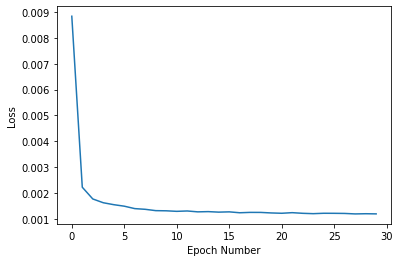

1/1 [==============================] - 0s 21ms/step


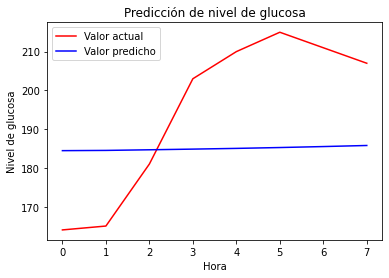

21.65123502415728 -0.192814193565636
**********lstmBidirectionalModel**************
Epoch 1/30
1072/1072 [==============================] - 35s 20ms/step - loss: 0.0056
Epoch 2/30
1072/1072 [==============================] - 22s 20ms/step - loss: 0.0022
Epoch 3/30
1072/1072 [==============================] - 22s 20ms/step - loss: 0.0016
Epoch 4/30
1072/1072 [==============================] - 22s 20ms/step - loss: 0.0015
Epoch 5/30
1072/1072 [==============================] - 22s 21ms/step - loss: 0.0014
Epoch 6/30
1072/1072 [==============================] - 21s 20ms/step - loss: 0.0014
Epoch 7/30
1072/1072 [==============================] - 21s 20ms/step - loss: 0.0013
Epoch 8/30
1072/1072 [==============================] - 22s 20ms/step - loss: 0.0013
Epoch 9/30
1072/1072 [==============================] - 22s 20ms/step - loss: 0.0013
Epoch 10/30
1072/1072 [==============================] - 22s 20ms/step - loss: 0.0012
Epoch 11/30
1072/1072 [==============================] - 22s 20ms

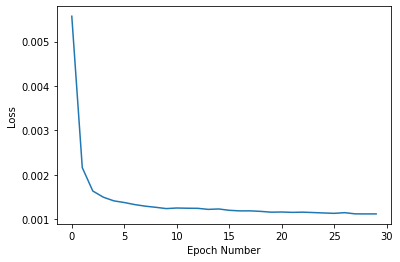

1/1 [==============================] - 0s 31ms/step


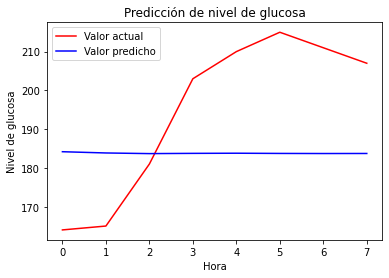

22.61508449963946 -0.301379254264206


In [41]:
#34304(total rows) - 8(values to predict)= 3496
training_set = dfLIB193310.iloc[:34296,1:2].values
test_set = dfLIB193310.iloc[34296:,1:2].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP)

####**30 minutos**

In [ ]:
dfLIB193310 = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193310'])].index
dfLIB193310.drop(indexAge , inplace=True)
indexAge = dfLIB193310[ (dfLIB193310['Date']<'2021-01-01 00:00:00') ].index
dfLIB193310.drop(indexAge , inplace=True)

indexAge = dfLIB193310[ (dfLIB193310['Date']>'2022-01-01 00:30:00') ].index
dfLIB193310.drop(indexAge , inplace=True)

dfLIB193310.drop('ID', inplace=True, axis=1)

dfLIB193310

,Date,Glucose level
994986,2021-01-01 00:12:00,172
994987,2021-01-01 00:27:00,166
994988,2021-01-01 00:42:00,159
994989,2021-01-01 00:57:00,143
994990,2021-01-01 01:12:00,127
...,...,...
1029279,2021-12-31 23:20:00,155
1029280,2021-12-31 23:36:00,156
1029281,2021-12-31 23:51:00,160
1029282,2022-01-01 00:06:00,164


Epoch 1/30
1072/1072 [==============================] - 53s 42ms/step - loss: 0.0090
Epoch 2/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0022
Epoch 3/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0018
Epoch 4/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0016
Epoch 5/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0015
Epoch 6/30
1072/1072 [==============================] - 44s 41ms/step - loss: 0.0015
Epoch 7/30
1072/1072 [==============================] - 44s 41ms/step - loss: 0.0014
Epoch 8/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0014
Epoch 9/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0013
Epoch 10/30
1072/1072 [==============================] - 44s 41ms/step - loss: 0.0013
Epoch 11/30
1072/1072 [==============================] - 44s 41ms/step - loss: 0.0013
Epoch 12/30
1072/1072 [==============================] - 44s 41

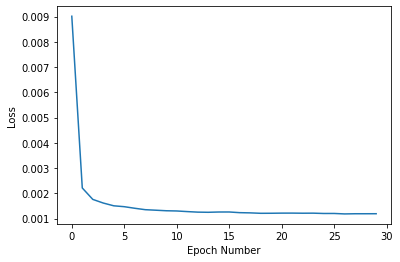

1/1 [==============================] - 0s 25ms/step


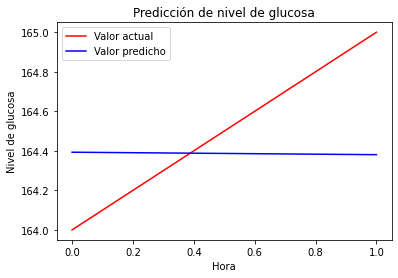

0.5187156163969204 -0.07626356277614832
**********lstmBidirectionalModel**************
Epoch 1/30
1072/1072 [==============================] - 107s 81ms/step - loss: 0.0052
Epoch 2/30
1072/1072 [==============================] - 86s 80ms/step - loss: 0.0020
Epoch 3/30
1072/1072 [==============================] - 83s 78ms/step - loss: 0.0016
Epoch 4/30
1072/1072 [==============================] - 87s 81ms/step - loss: 0.0015
Epoch 5/30
1072/1072 [==============================] - 85s 79ms/step - loss: 0.0014
Epoch 6/30
1072/1072 [==============================] - 85s 79ms/step - loss: 0.0014
Epoch 7/30
1072/1072 [==============================] - 82s 77ms/step - loss: 0.0013
Epoch 8/30
1072/1072 [==============================] - 84s 79ms/step - loss: 0.0013
Epoch 9/30
1072/1072 [==============================] - 84s 78ms/step - loss: 0.0013
Epoch 10/30
1072/1072 [==============================] - 86s 80ms/step - loss: 0.0012
Epoch 11/30
1072/1072 [==============================] - 83s 

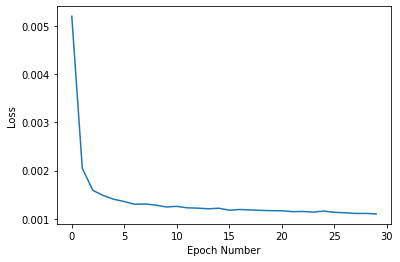

1/1 [==============================] - 0s 26ms/step


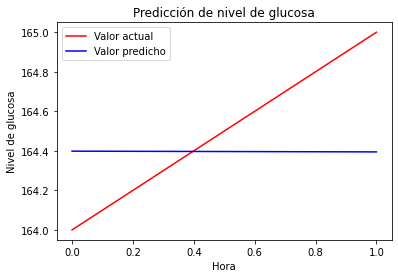

0.5124137877503528 -0.05027155950665474


In [ ]:
training_set = dfLIB193310.iloc[:34296,1:2].values
test_set = dfLIB193310.iloc[34296:,1:2].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)  

lstmModel(X_train, y_train,WT,WP)
print('**********lstmBidirectionalModel**************')
lstmBidirectionalModel(X_train, y_train,WT,WP)

# **LIB193310 Segundo escenario**

####**Primer escenario 2 horas**

In [31]:
df2LIB193310 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193310'])].index
df2LIB193310.drop(indexAge , inplace=True)

indexAge = df2LIB193310[ (df2LIB193310['Date']<'2021-01-01 00:00:00') ].index
df2LIB193310.drop(indexAge , inplace=True)

indexAge = df2LIB193310[ (df2LIB193310['Date']>'2022-01-01 02:00:00') ].index
df2LIB193310.drop(indexAge , inplace=True)

df2LIB193310.drop('ID', inplace=True, axis=1)

df2LIB193310

,Date,Glucose level,Estacion,MomentoDia,DiaSemana,Mes
994986,2021-01-01 00:12:00,172,Invierno,Madrugada,Friday,Jan
994987,2021-01-01 00:27:00,166,Invierno,Madrugada,Friday,Jan
994988,2021-01-01 00:42:00,159,Invierno,Madrugada,Friday,Jan
994989,2021-01-01 00:57:00,143,Invierno,Madrugada,Friday,Jan
994990,2021-01-01 01:12:00,127,Invierno,Madrugada,Friday,Jan
...,...,...,...,...,...,...
1029285,2022-01-01 00:51:00,203,Invierno,Madrugada,Saturday,Jan
1029286,2022-01-01 01:05:00,210,Invierno,Madrugada,Saturday,Jan
1029287,2022-01-01 01:20:00,215,Invierno,Madrugada,Saturday,Jan
1029288,2022-01-01 01:35:00,211,Invierno,Madrugada,Saturday,Jan


In [ ]:
df2LIB193310 = df2LIB193310[['Date', 'Estacion', 'MomentoDia', 'DiaSemana', 'Mes','Glucose level']]

In [ ]:
df2LIB193310['Estacion'] = LabelEncoder().fit_transform(df2LIB193310['Estacion'])
df2LIB193310['MomentoDia'] = LabelEncoder().fit_transform(df2LIB193310['MomentoDia'])
df2LIB193310['DiaSemana'] = LabelEncoder().fit_transform(df2LIB193310['DiaSemana'])
df2LIB193310['Mes'] = LabelEncoder().fit_transform(df2LIB193310['Mes'])

In [ ]:
df2LIB193310.columns.tolist()
df2LIB193310

,Date,Estacion,MomentoDia,DiaSemana,Mes,Glucose level
994986,2021-01-01 00:12:00,0,0,0,4,172
994987,2021-01-01 00:27:00,0,0,0,4,166
994988,2021-01-01 00:42:00,0,0,0,4,159
994989,2021-01-01 00:57:00,0,0,0,4,143
994990,2021-01-01 01:12:00,0,0,0,4,127
...,...,...,...,...,...,...
1029285,2022-01-01 00:51:00,0,0,2,4,203
1029286,2022-01-01 01:05:00,0,0,2,4,210
1029287,2022-01-01 01:20:00,0,0,2,4,215
1029288,2022-01-01 01:35:00,0,0,2,4,211


Epoch 1/30
1072/1072 [==============================] - 54s 42ms/step - loss: 0.0104
Epoch 2/30
1072/1072 [==============================] - 48s 45ms/step - loss: 0.0026
Epoch 3/30
1072/1072 [==============================] - 46s 43ms/step - loss: 0.0019
Epoch 4/30
1072/1072 [==============================] - 46s 43ms/step - loss: 0.0017
Epoch 5/30
1072/1072 [==============================] - 48s 45ms/step - loss: 0.0016
Epoch 6/30
1072/1072 [==============================] - 46s 43ms/step - loss: 0.0015
Epoch 7/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0014
Epoch 8/30
1072/1072 [==============================] - 45s 42ms/step - loss: 0.0014
Epoch 9/30
1072/1072 [==============================] - 47s 44ms/step - loss: 0.0014
Epoch 10/30
1072/1072 [==============================] - 46s 42ms/step - loss: 0.0013
Epoch 11/30
1072/1072 [==============================] - 44s 41ms/step - loss: 0.0013
Epoch 12/30
1072/1072 [==============================] - 45s 42

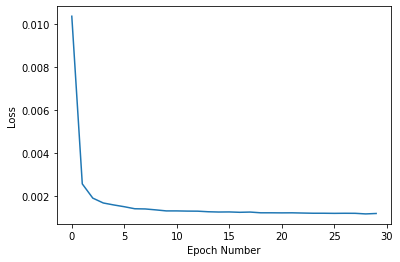

1/1 [==============================] - 0s 22ms/step


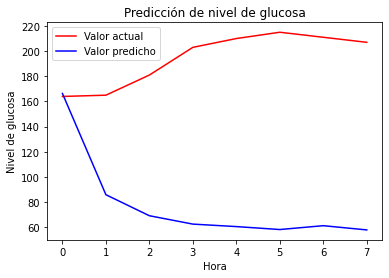

59.623860237859574 127.44633987289743
**********lstmBidirectionalModel**************
Epoch 1/30
1072/1072 [==============================] - 104s 80ms/step - loss: 0.0069
Epoch 2/30
1072/1072 [==============================] - 84s 79ms/step - loss: 0.0028
Epoch 3/30
1072/1072 [==============================] - 87s 81ms/step - loss: 0.0019
Epoch 4/30
1072/1072 [==============================] - 85s 79ms/step - loss: 0.0016
Epoch 5/30
1072/1072 [==============================] - 87s 81ms/step - loss: 0.0015
Epoch 6/30
1072/1072 [==============================] - 85s 80ms/step - loss: 0.0015
Epoch 7/30
1072/1072 [==============================] - 88s 82ms/step - loss: 0.0014
Epoch 8/30
1072/1072 [==============================] - 86s 80ms/step - loss: 0.0014
Epoch 9/30
1072/1072 [==============================] - 86s 80ms/step - loss: 0.0013
Epoch 10/30
1072/1072 [==============================] - 85s 80ms/step - loss: 0.0013
Epoch 11/30
1072/1072 [==============================] - 85s 79

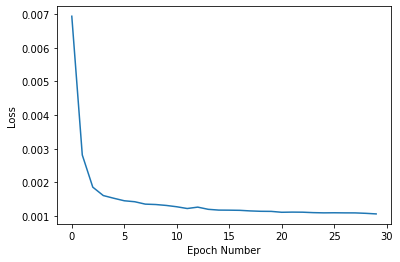

1/1 [==============================] - 0s 26ms/step


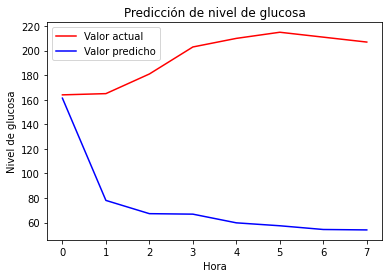

61.083707513502695 129.6335937072414


In [ ]:
training_set = df2LIB193310.iloc[:34296,1:6].values
test_set = df2LIB193310.iloc[34296:,1:6].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:4]

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:5])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 5))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP)

####**30 minutos**

Epoch 1/30
1072/1072 [==============================] - 22s 10ms/step - loss: 0.0110
Epoch 2/30
1072/1072 [==============================] - 11s 11ms/step - loss: 0.0026
Epoch 3/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0019
Epoch 4/30
1072/1072 [==============================] - 11s 11ms/step - loss: 0.0017
Epoch 5/30
1072/1072 [==============================] - 11s 11ms/step - loss: 0.0016
Epoch 6/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0015
Epoch 7/30
1072/1072 [==============================] - 12s 11ms/step - loss: 0.0014
Epoch 8/30
1072/1072 [==============================] - 12s 11ms/step - loss: 0.0014
Epoch 9/30
1072/1072 [==============================] - 12s 11ms/step - loss: 0.0013
Epoch 10/30
1072/1072 [==============================] - 11s 11ms/step - loss: 0.0013
Epoch 11/30
1072/1072 [==============================] - 11s 10ms/step - loss: 0.0013
Epoch 12/30
1072/1072 [==============================] - 11s 11

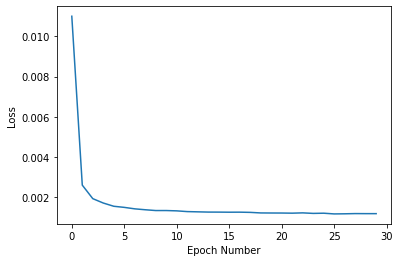

1/1 [==============================] - 0s 20ms/step


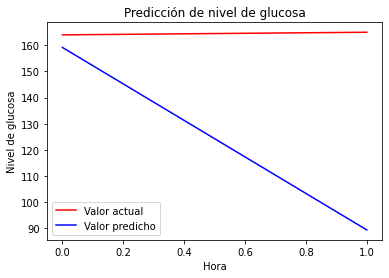

24.451581076701657 53.58875039833916
**********lstmBidirectionalModel**************
Epoch 1/30
1072/1072 [==============================] - 36s 22ms/step - loss: 0.0071
Epoch 2/30
1072/1072 [==============================] - 23s 22ms/step - loss: 0.0032
Epoch 3/30
1072/1072 [==============================] - 23s 21ms/step - loss: 0.0024
Epoch 4/30
1072/1072 [==============================] - 29s 27ms/step - loss: 0.0017
Epoch 5/30
1072/1072 [==============================] - 27s 25ms/step - loss: 0.0016
Epoch 6/30
1072/1072 [==============================] - 26s 24ms/step - loss: 0.0015
Epoch 7/30
1072/1072 [==============================] - 29s 27ms/step - loss: 0.0014
Epoch 8/30
1072/1072 [==============================] - 25s 23ms/step - loss: 0.0014
Epoch 9/30
1072/1072 [==============================] - 23s 21ms/step - loss: 0.0013
Epoch 10/30
1072/1072 [==============================] - 23s 21ms/step - loss: 0.0013
Epoch 11/30
1072/1072 [==============================] - 23s 21ms

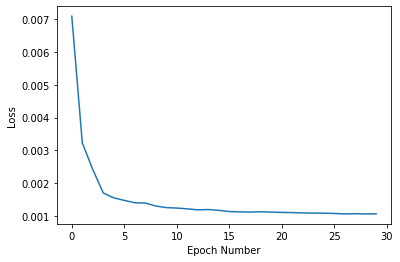

1/1 [==============================] - 0s 19ms/step


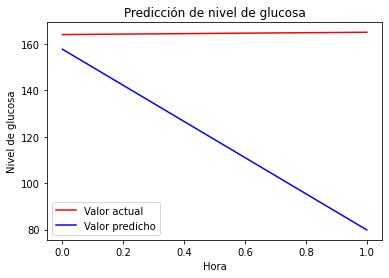

27.787299131518893 60.348043577761175


In [ ]:
df2LIB193310 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193310'])].index
df2LIB193310.drop(indexAge , inplace=True)

indexAge = df2LIB193310[ (df2LIB193310['Date']<'2021-01-01 00:00:00') ].index
df2LIB193310.drop(indexAge , inplace=True)

indexAge = df2LIB193310[ (df2LIB193310['Date']>'2022-01-01 00:30:00') ].index
df2LIB193310.drop(indexAge , inplace=True)

df2LIB193310.drop('ID', inplace=True, axis=1)
df2LIB193310 = df2LIB193310[['Date', 'Estacion', 'MomentoDia', 'DiaSemana', 'Mes','Glucose level']]

df2LIB193310['Estacion'] = LabelEncoder().fit_transform(df2LIB193310['Estacion'])
df2LIB193310['MomentoDia'] = LabelEncoder().fit_transform(df2LIB193310['MomentoDia'])
df2LIB193310['DiaSemana'] = LabelEncoder().fit_transform(df2LIB193310['DiaSemana'])
df2LIB193310['Mes'] = LabelEncoder().fit_transform(df2LIB193310['Mes'])
df2LIB193310

training_set = df2LIB193310.iloc[:34296,1:6].values
test_set = df2LIB193310.iloc[34296:,1:6].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:4]

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:5])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 5))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP)

# **LIB193277 Primer escenario**

####**Primer escenario 2 horas**

In [33]:
dfLIB193277 = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193277'])].index
dfLIB193277.drop(indexAge , inplace=True)
indexAge = dfLIB193277[ (dfLIB193277['Date']<'2021-01-01 00:00:00') ].index
dfLIB193277.drop(indexAge , inplace=True)

indexAge = dfLIB193277[ (dfLIB193277['Date']>'2022-01-01 02:00:00') ].index
dfLIB193277.drop(indexAge , inplace=True)

dfLIB193277.drop('ID', inplace=True, axis=1)
dfLIB193277

,Date,Glucose level
513224,2021-01-01 00:02:00,128
513225,2021-01-01 00:16:00,122
513226,2021-01-01 00:32:00,122
513227,2021-01-01 00:47:00,118
513228,2021-01-01 01:02:00,113
...,...,...
547667,2022-01-01 00:54:00,132
547668,2022-01-01 01:08:00,127
547669,2022-01-01 01:23:00,131
547670,2022-01-01 01:39:00,146


Epoch 1/30
1076/1076 [==============================] - 20s 9ms/step - loss: 0.0056
Epoch 2/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 3/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0012
Epoch 4/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0011
Epoch 5/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0011
Epoch 6/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0010
Epoch 7/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0010
Epoch 8/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0010
Epoch 9/30
1076/1076 [==============================] - 10s 9ms/step - loss: 9.9833e-04
Epoch 10/30
1076/1076 [==============================] - 10s 10ms/step - loss: 9.7785e-04
Epoch 11/30
1076/1076 [==============================] - 10s 9ms/step - loss: 9.6646e-04
Epoch 12/30
1076/1076 [==============================] - 10s 

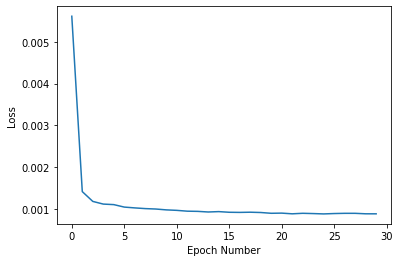

1/1 [==============================] - 0s 17ms/step


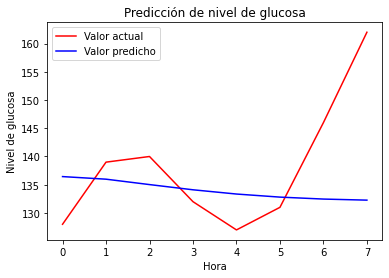

12.34987132113325 -0.2831913481671051
**********lstmBidirectionalModel**************
Epoch 1/30
1076/1076 [==============================] - 31s 17ms/step - loss: 0.0036
Epoch 2/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0014
Epoch 3/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0011
Epoch 4/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0011
Epoch 5/30
1076/1076 [==============================] - 19s 17ms/step - loss: 0.0010
Epoch 6/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.9508e-04
Epoch 7/30
1076/1076 [==============================] - 19s 17ms/step - loss: 9.7949e-04
Epoch 8/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.4729e-04
Epoch 9/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.3820e-04
Epoch 10/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.2592e-04
Epoch 11/30
1076/1076 [=====================

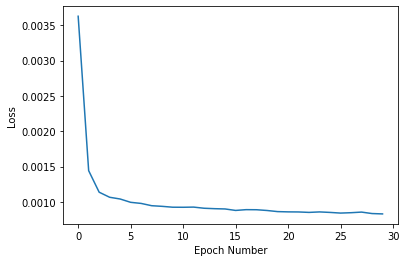

1/1 [==============================] - 0s 19ms/step


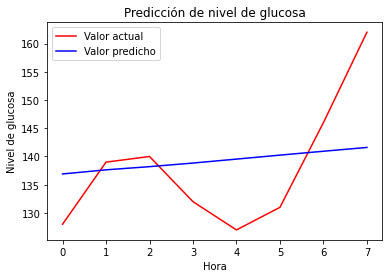

10.097181165736915 0.14223789672701626


In [ ]:
#34448(total rows) - 8(values to predict)= 34440
training_set = dfLIB193277.iloc[:34440,1:2].values
test_set = dfLIB193277.iloc[34440:,1:2].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmBidirectionalModel(X_train, y_train,WT,WP)

####**30 minutos**

In [ ]:
dfLIB193277 = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193277'])].index
dfLIB193277.drop(indexAge , inplace=True)
indexAge = dfLIB193277[ (dfLIB193277['Date']<'2021-01-01 00:00:00') ].index
dfLIB193277.drop(indexAge , inplace=True)

indexAge = dfLIB193277[ (dfLIB193277['Date']>'2022-01-01 00:30:00') ].index
dfLIB193277.drop(indexAge , inplace=True)

dfLIB193277.drop('ID', inplace=True, axis=1)
dfLIB193277

,Date,Glucose level
513224,2021-01-01 00:02:00,128
513225,2021-01-01 00:16:00,122
513226,2021-01-01 00:32:00,122
513227,2021-01-01 00:47:00,118
513228,2021-01-01 01:02:00,113
...,...,...
547661,2021-12-31 23:24:00,107
547662,2021-12-31 23:39:00,107
547663,2021-12-31 23:54:00,115
547664,2022-01-01 00:09:00,128


Epoch 1/30
1076/1076 [==============================] - 15s 9ms/step - loss: 0.0060
Epoch 2/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0015
Epoch 3/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0012
Epoch 4/30
1076/1076 [==============================] - 10s 10ms/step - loss: 0.0011
Epoch 5/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0011
Epoch 6/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0011
Epoch 7/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0010
Epoch 8/30
1076/1076 [==============================] - 10s 9ms/step - loss: 0.0010
Epoch 9/30
1076/1076 [==============================] - 10s 9ms/step - loss: 9.8617e-04
Epoch 10/30
1076/1076 [==============================] - 10s 9ms/step - loss: 9.7108e-04
Epoch 11/30
1076/1076 [==============================] - 10s 9ms/step - loss: 9.6620e-04
Epoch 12/30
1076/1076 [==============================] - 10s 

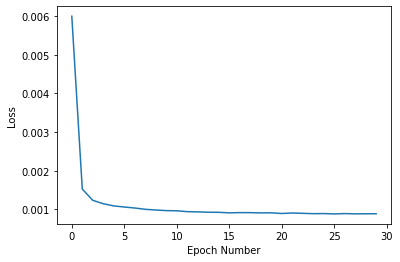

1/1 [==============================] - 0s 22ms/step


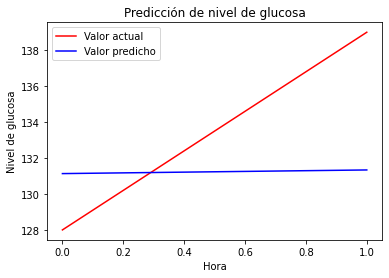

5.854423888758984 -0.13303401881890475
**********lstmBidirectionalModel**************
Epoch 1/30
1076/1076 [==============================] - 30s 17ms/step - loss: 0.0039
Epoch 2/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0015
Epoch 3/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0011
Epoch 4/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0011
Epoch 5/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0010
Epoch 6/30
1076/1076 [==============================] - 18s 17ms/step - loss: 0.0010
Epoch 7/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.7520e-04
Epoch 8/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.3782e-04
Epoch 9/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.3154e-04
Epoch 10/30
1076/1076 [==============================] - 18s 17ms/step - loss: 9.3157e-04
Epoch 11/30
1076/1076 [========================

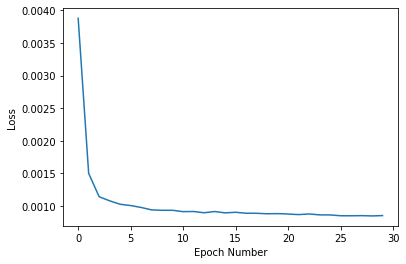

1/1 [==============================] - 0s 17ms/step


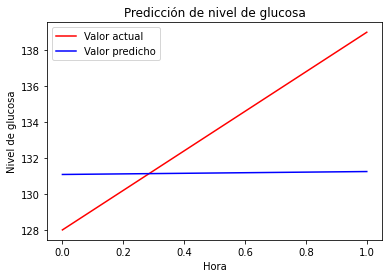

5.899719599906142 -0.15063442504187385


In [ ]:
training_set = dfLIB193277.iloc[:34440,1:2].values
test_set = dfLIB193277.iloc[34440:,1:2].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmBidirectionalModel(X_train, y_train,WT,WP)

# **LIB193277 Segundo escenario**

####**Primer escenario 2 horas**

In [ ]:
df2LIB193277 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193277'])].index
df2LIB193277.drop(indexAge , inplace=True)

indexAge = df2LIB193277[ (df2LIB193277['Date']<'2021-01-01 00:00:00') ].index
df2LIB193277.drop(indexAge , inplace=True)

indexAge = df2LIB193277[ (df2LIB193277['Date']>'2022-01-01 02:00:00') ].index
df2LIB193277.drop(indexAge , inplace=True)

df2LIB193277.drop('ID', inplace=True, axis=1)

df2LIB193277

,Date,Glucose level,Estacion,MomentoDia,DiaSemana,Mes
513224,2021-01-01 00:02:00,128,Invierno,Madrugada,Friday,Jan
513225,2021-01-01 00:16:00,122,Invierno,Madrugada,Friday,Jan
513226,2021-01-01 00:32:00,122,Invierno,Madrugada,Friday,Jan
513227,2021-01-01 00:47:00,118,Invierno,Madrugada,Friday,Jan
513228,2021-01-01 01:02:00,113,Invierno,Madrugada,Friday,Jan
...,...,...,...,...,...,...
547667,2022-01-01 00:54:00,132,Invierno,Madrugada,Saturday,Jan
547668,2022-01-01 01:08:00,127,Invierno,Madrugada,Saturday,Jan
547669,2022-01-01 01:23:00,131,Invierno,Madrugada,Saturday,Jan
547670,2022-01-01 01:39:00,146,Invierno,Madrugada,Saturday,Jan


In [ ]:
df2LIB193277 = df2LIB193277[['Date', 'Estacion', 'MomentoDia', 'DiaSemana', 'Mes','Glucose level']]
df2LIB193277['Estacion'] = LabelEncoder().fit_transform(df2LIB193277['Estacion'])
df2LIB193277['MomentoDia'] = LabelEncoder().fit_transform(df2LIB193277['MomentoDia'])
df2LIB193277['DiaSemana'] = LabelEncoder().fit_transform(df2LIB193277['DiaSemana'])
df2LIB193277['Mes'] = LabelEncoder().fit_transform(df2LIB193277['Mes'])
df2LIB193277

,Date,Estacion,MomentoDia,DiaSemana,Mes,Glucose level
513224,2021-01-01 00:02:00,0,0,0,4,128
513225,2021-01-01 00:16:00,0,0,0,4,122
513226,2021-01-01 00:32:00,0,0,0,4,122
513227,2021-01-01 00:47:00,0,0,0,4,118
513228,2021-01-01 01:02:00,0,0,0,4,113
...,...,...,...,...,...,...
547667,2022-01-01 00:54:00,0,0,2,4,132
547668,2022-01-01 01:08:00,0,0,2,4,127
547669,2022-01-01 01:23:00,0,0,2,4,131
547670,2022-01-01 01:39:00,0,0,2,4,146


Epoch 1/30
1076/1076 [==============================] - 18s 11ms/step - loss: 0.0069
Epoch 2/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0018
Epoch 3/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0013
Epoch 4/30
1076/1076 [==============================] - 11s 11ms/step - loss: 0.0012
Epoch 5/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0011
Epoch 6/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0011
Epoch 7/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0010
Epoch 8/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0010
Epoch 9/30
1076/1076 [==============================] - 11s 10ms/step - loss: 0.0010
Epoch 10/30
1076/1076 [==============================] - 11s 11ms/step - loss: 9.9182e-04
Epoch 11/30
1076/1076 [==============================] - 11s 11ms/step - loss: 9.6746e-04
Epoch 12/30
1076/1076 [==============================] 

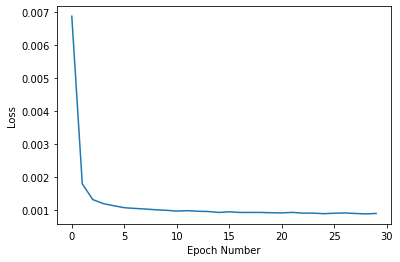

1/1 [==============================] - 0s 19ms/step


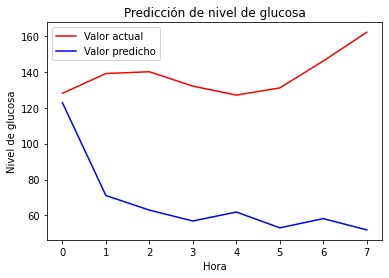

50.94629549451945 76.10512019770675
**********lstmBidirectionalModel**************
Epoch 1/30
1076/1076 [==============================] - 35s 21ms/step - loss: 0.0047
Epoch 2/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0024
Epoch 3/30
1076/1076 [==============================] - 23s 21ms/step - loss: 0.0016
Epoch 4/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0012
Epoch 5/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0011
Epoch 6/30
1076/1076 [==============================] - 23s 21ms/step - loss: 0.0010
Epoch 7/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0010
Epoch 8/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0010
Epoch 9/30
1076/1076 [==============================] - 22s 21ms/step - loss: 9.5637e-04
Epoch 10/30
1076/1076 [==============================] - 22s 21ms/step - loss: 9.6720e-04
Epoch 11/30
1076/1076 [==============================] - 2

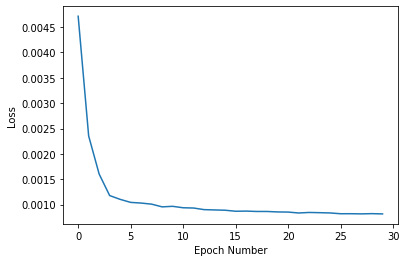

1/1 [==============================] - 0s 19ms/step


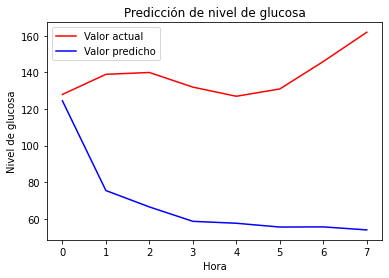

50.14321093125158 75.16876349001062


In [ ]:
training_set = df2LIB193277.iloc[:34440,1:6].values
test_set = df2LIB193277.iloc[34440:,1:6].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:4]

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:5])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 5))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP)

####**30 minutos**

In [ ]:
df2LIB193277 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193277'])].index
df2LIB193277.drop(indexAge , inplace=True)

indexAge = df2LIB193277[ (df2LIB193277['Date']<'2021-01-01 00:00:00') ].index
df2LIB193277.drop(indexAge , inplace=True)

indexAge = df2LIB193277[ (df2LIB193277['Date']>'2022-01-01 00:30:00') ].index
df2LIB193277.drop(indexAge , inplace=True)

df2LIB193277.drop('ID', inplace=True, axis=1)
df2LIB193277 = df2LIB193277[['Date', 'Estacion', 'MomentoDia', 'DiaSemana', 'Mes','Glucose level']]


df2LIB193277['Estacion'] = LabelEncoder().fit_transform(df2LIB193277['Estacion'])
df2LIB193277['MomentoDia'] = LabelEncoder().fit_transform(df2LIB193277['MomentoDia'])
df2LIB193277['DiaSemana'] = LabelEncoder().fit_transform(df2LIB193277['DiaSemana'])
df2LIB193277['Mes'] = LabelEncoder().fit_transform(df2LIB193277['Mes'])

df2LIB193277

,Date,Estacion,MomentoDia,DiaSemana,Mes,Glucose level
513224,2021-01-01 00:02:00,0,0,0,4,128
513225,2021-01-01 00:16:00,0,0,0,4,122
513226,2021-01-01 00:32:00,0,0,0,4,122
513227,2021-01-01 00:47:00,0,0,0,4,118
513228,2021-01-01 01:02:00,0,0,0,4,113
...,...,...,...,...,...,...
547661,2021-12-31 23:24:00,0,2,0,2,107
547662,2021-12-31 23:39:00,0,2,0,2,107
547663,2021-12-31 23:54:00,0,2,0,2,115
547664,2022-01-01 00:09:00,0,0,2,4,128


Epoch 1/30
1076/1076 [==============================] - 18s 11ms/step - loss: 0.0076
Epoch 2/30
1076/1076 [==============================] - 11s 10ms/step - loss: 0.0019
Epoch 3/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0014
Epoch 4/30
1076/1076 [==============================] - 11s 10ms/step - loss: 0.0012
Epoch 5/30
1076/1076 [==============================] - 11s 10ms/step - loss: 0.0011
Epoch 6/30
1076/1076 [==============================] - 11s 10ms/step - loss: 0.0011
Epoch 7/30
1076/1076 [==============================] - 11s 10ms/step - loss: 0.0011
Epoch 8/30
1076/1076 [==============================] - 11s 10ms/step - loss: 0.0010
Epoch 9/30
1076/1076 [==============================] - 12s 11ms/step - loss: 0.0010
Epoch 10/30
1076/1076 [==============================] - 12s 11ms/step - loss: 9.8810e-04
Epoch 11/30
1076/1076 [==============================] - 11s 10ms/step - loss: 9.6920e-04
Epoch 12/30
1076/1076 [==============================] 

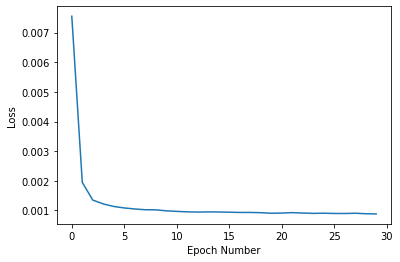

1/1 [==============================] - 0s 17ms/step


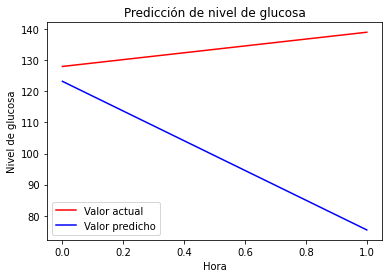

25.469050208012835 45.06867232580997
**********lstmBidirectionalModel**************
Epoch 1/30
1076/1076 [==============================] - 36s 21ms/step - loss: 0.0049
Epoch 2/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0024
Epoch 3/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0018
Epoch 4/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0013
Epoch 5/30
1076/1076 [==============================] - 24s 22ms/step - loss: 0.0011
Epoch 6/30
1076/1076 [==============================] - 22s 21ms/step - loss: 0.0011
Epoch 7/30
1076/1076 [==============================] - 22s 20ms/step - loss: 0.0010
Epoch 8/30
1076/1076 [==============================] - 23s 21ms/step - loss: 9.9633e-04
Epoch 9/30
1076/1076 [==============================] - 23s 21ms/step - loss: 9.7152e-04
Epoch 10/30
1076/1076 [==============================] - 23s 21ms/step - loss: 9.7995e-04
Epoch 11/30
1076/1076 [==============================

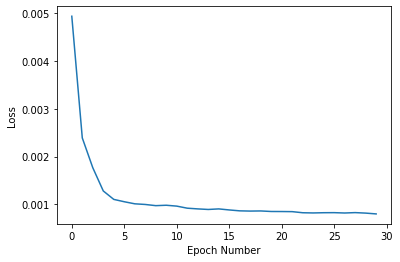

1/1 [==============================] - 0s 20ms/step


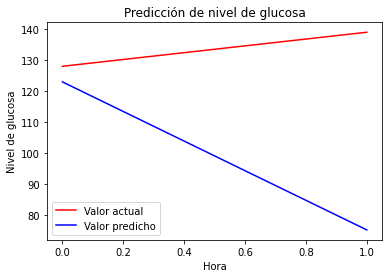

25.685592499568312 45.306911515507316


In [ ]:
training_set = df2LIB193277.iloc[:34440,1:6].values
test_set = df2LIB193277.iloc[34440:,1:6].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:4]

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:5])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 5))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP)

# **LIB193385 Primer escenario**

####**Primer escenario 2 horas**

In [35]:
dfLIB193385 = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193385'])].index
dfLIB193385.drop(indexAge , inplace=True)
indexAge = dfLIB193385[ (dfLIB193385['Date']<'2021-01-01 00:00:00') ].index
dfLIB193385.drop(indexAge , inplace=True)

indexAge = dfLIB193385[ (dfLIB193385['Date']>'2022-01-01 02:00:00') ].index
dfLIB193385.drop(indexAge , inplace=True)

dfLIB193385.drop('ID', inplace=True, axis=1)
dfLIB193385

,Date,Glucose level
2648679,2021-01-01 00:05:00,143
2648680,2021-01-01 00:20:00,147
2648681,2021-01-01 00:35:00,148
2648682,2021-01-01 00:54:00,140
2648683,2021-01-01 01:09:00,143
...,...,...
2691761,2022-01-01 00:59:00,135
2691762,2022-01-01 01:14:00,139
2691763,2022-01-01 01:29:00,131
2691764,2022-01-01 01:44:00,119


Epoch 1/30
1346/1346 [==============================] - 17s 9ms/step - loss: 0.0066
Epoch 2/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0022
Epoch 3/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0019
Epoch 4/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0017
Epoch 5/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0016
Epoch 6/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0016
Epoch 7/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0015
Epoch 8/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0014
Epoch 9/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0014
Epoch 10/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0013
Epoch 11/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 12/30
1346/1346 [==============================] - 12s 9ms/step - lo

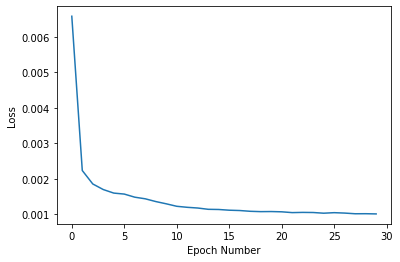

1/1 [==============================] - 0s 16ms/step


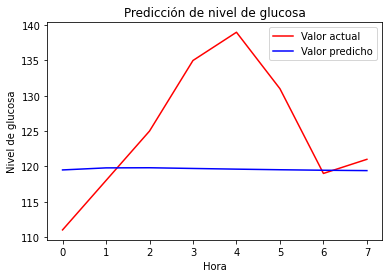

10.288360798295868 -0.34653618497680716
**********lstmBidirectionalModel**************
Epoch 1/30
1346/1346 [==============================] - 35s 17ms/step - loss: 0.0042
Epoch 2/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0021
Epoch 3/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0018
Epoch 4/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0017
Epoch 5/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0016
Epoch 6/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0015
Epoch 7/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0015
Epoch 8/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0015
Epoch 9/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0015
Epoch 10/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0015
Epoch 11/30
1346/1346 [==============================] - 23s 1

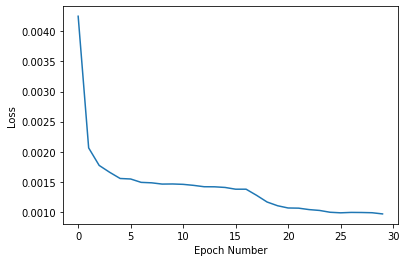

1/1 [==============================] - 0s 18ms/step


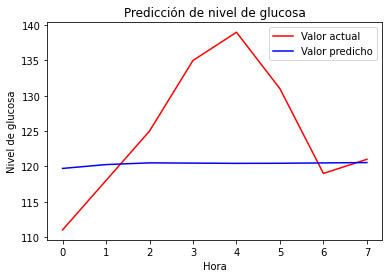

9.81971360942046 -0.22665744856815562


In [ ]:
#43087(total rows) - 8(values to predict)= 43079
training_set = dfLIB193385.iloc[:43079,1:2].values
test_set = dfLIB193385.iloc[43079:,1:2].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmBidirectionalModel(X_train, y_train,WT,WP)

####**30 minutos**

In [ ]:
dfLIB193385 = dfPrimerEscenario.copy()
indexAge = dfPrimerEscenario[~dfPrimerEscenario['ID'].isin(['LIB193385'])].index
dfLIB193385.drop(indexAge , inplace=True)
indexAge = dfLIB193385[ (dfLIB193385['Date']<'2021-01-01 00:00:00') ].index
dfLIB193385.drop(indexAge , inplace=True)

indexAge = dfLIB193385[ (dfLIB193385['Date']>'2022-01-01 00:30:00') ].index
dfLIB193385.drop(indexAge , inplace=True)

dfLIB193385.drop('ID', inplace=True, axis=1)
dfLIB193385

,Date,Glucose level
2648679,2021-01-01 00:05:00,143
2648680,2021-01-01 00:20:00,147
2648681,2021-01-01 00:35:00,148
2648682,2021-01-01 00:54:00,140
2648683,2021-01-01 01:09:00,143
...,...,...
2691755,2021-12-31 23:28:00,91
2691756,2021-12-31 23:43:00,97
2691757,2021-12-31 23:58:00,106
2691758,2022-01-01 00:13:00,111


Epoch 1/30
1346/1346 [==============================] - 17s 9ms/step - loss: 0.0067
Epoch 2/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0022
Epoch 3/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0018
Epoch 4/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0017
Epoch 5/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0016
Epoch 6/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0016
Epoch 7/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0015
Epoch 8/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0014
Epoch 9/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0014
Epoch 10/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0013
Epoch 11/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 12/30
1346/1346 [==============================] - 12s 9ms/step - lo

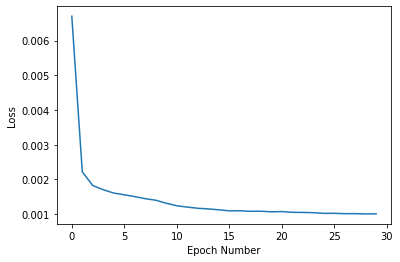

1/1 [==============================] - 0s 18ms/step


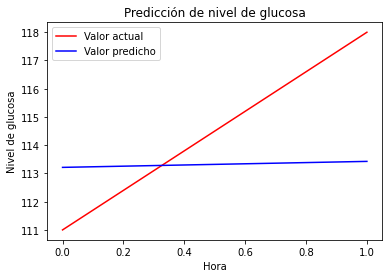

3.5930287903823115 -0.05386578681764709
**********lstmBidirectionalModel**************
Epoch 1/30
1346/1346 [==============================] - 34s 16ms/step - loss: 0.0040
Epoch 2/30
1346/1346 [==============================] - 22s 16ms/step - loss: 0.0020
Epoch 3/30
1346/1346 [==============================] - 22s 16ms/step - loss: 0.0018
Epoch 4/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0017
Epoch 5/30
1346/1346 [==============================] - 22s 16ms/step - loss: 0.0016
Epoch 6/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0015
Epoch 7/30
1346/1346 [==============================] - 22s 16ms/step - loss: 0.0015
Epoch 8/30
1346/1346 [==============================] - 22s 16ms/step - loss: 0.0015
Epoch 9/30
1346/1346 [==============================] - 22s 16ms/step - loss: 0.0015
Epoch 10/30
1346/1346 [==============================] - 22s 16ms/step - loss: 0.0015
Epoch 11/30
1346/1346 [==============================] - 22s 1

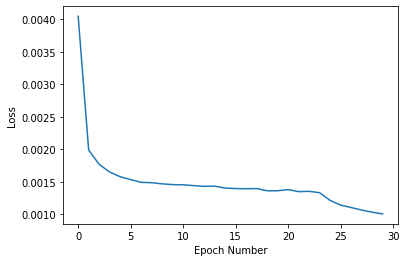

1/1 [==============================] - 0s 20ms/step


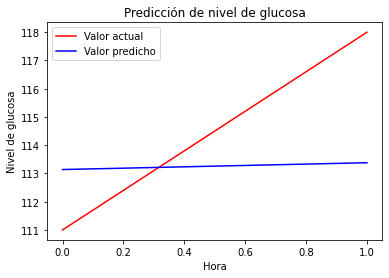

3.6002772692266136 -0.05812215635182372


In [ ]:
training_set = dfLIB193385.iloc[:43079,1:2].values
test_set = dfLIB193385.iloc[43079:,1:2].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:1])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

lstmModel(X_train, y_train,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmBidirectionalModel(X_train, y_train,WT,WP)

# **LIB193385 Segundo escenario**

####**Primer escenario 2 horas**

In [ ]:
df2LIB193385 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193385'])].index
df2LIB193385.drop(indexAge , inplace=True)

indexAge = df2LIB193385[ (df2LIB193385['Date']<'2021-01-01 00:00:00') ].index
df2LIB193385.drop(indexAge , inplace=True)

indexAge = df2LIB193385[ (df2LIB193385['Date']>'2022-01-01 02:00:00') ].index
df2LIB193385.drop(indexAge , inplace=True)

df2LIB193385.drop('ID', inplace=True, axis=1)

df2LIB193385

,Date,Glucose level,Estacion,MomentoDia,DiaSemana,Mes
2648679,2021-01-01 00:05:00,143,Invierno,Madrugada,Friday,Jan
2648680,2021-01-01 00:20:00,147,Invierno,Madrugada,Friday,Jan
2648681,2021-01-01 00:35:00,148,Invierno,Madrugada,Friday,Jan
2648682,2021-01-01 00:54:00,140,Invierno,Madrugada,Friday,Jan
2648683,2021-01-01 01:09:00,143,Invierno,Madrugada,Friday,Jan
...,...,...,...,...,...,...
2691761,2022-01-01 00:59:00,135,Invierno,Madrugada,Saturday,Jan
2691762,2022-01-01 01:14:00,139,Invierno,Madrugada,Saturday,Jan
2691763,2022-01-01 01:29:00,131,Invierno,Madrugada,Saturday,Jan
2691764,2022-01-01 01:44:00,119,Invierno,Madrugada,Saturday,Jan


In [ ]:
df2LIB193385 = df2LIB193385[['Date', 'Estacion', 'MomentoDia', 'DiaSemana', 'Mes','Glucose level']]
df2LIB193385['Estacion'] = LabelEncoder().fit_transform(df2LIB193385['Estacion'])
df2LIB193385['MomentoDia'] = LabelEncoder().fit_transform(df2LIB193385['MomentoDia'])
df2LIB193385['DiaSemana'] = LabelEncoder().fit_transform(df2LIB193385['DiaSemana'])
df2LIB193385['Mes'] = LabelEncoder().fit_transform(df2LIB193385['Mes'])

Epoch 1/30
1346/1346 [==============================] - 17s 9ms/step - loss: 0.0077
Epoch 2/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0025
Epoch 3/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0019
Epoch 4/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0017
Epoch 5/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0016
Epoch 6/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0015
Epoch 7/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0014
Epoch 8/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0013
Epoch 9/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0013
Epoch 10/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 11/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 12/30
1346/1346 [==============================] - 12s 9ms/step - lo

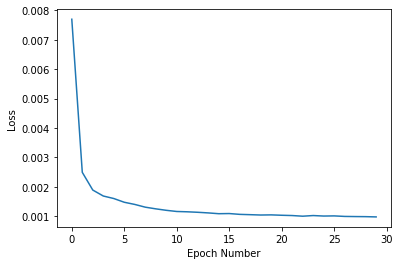

1/1 [==============================] - 0s 17ms/step


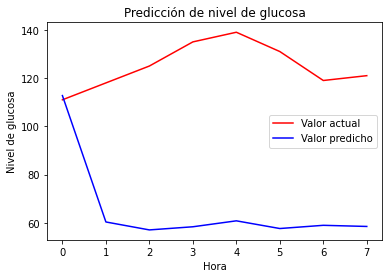

47.28247603412004 64.0433996594758
**********lstmBidirectionalModel**************
Epoch 1/30
1346/1346 [==============================] - 35s 17ms/step - loss: 0.0053
Epoch 2/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0025
Epoch 3/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0020
Epoch 4/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0018
Epoch 5/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0017
Epoch 6/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0016
Epoch 7/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0015
Epoch 8/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0014
Epoch 9/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0013
Epoch 10/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0012
Epoch 11/30
1346/1346 [==============================] - 23s 17ms/s

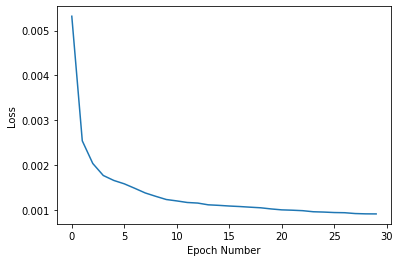

1/1 [==============================] - 0s 19ms/step


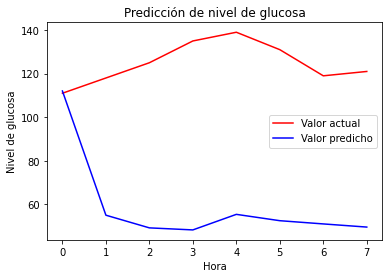

52.44375674969479 70.81088801410563


In [ ]:
training_set = df2LIB193385.iloc[:43079,1:6].values
test_set = df2LIB193385.iloc[43079:,1:6].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:4]

X_train = []
y_train = []
WT = 16
WP = 8

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:5])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 5))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP)

####**30 minutos**

In [ ]:
df2LIB193385 = dfSegundoEscenario.copy()
indexAge = dfSegundoEscenario[~dfSegundoEscenario['ID'].isin(['LIB193385'])].index
df2LIB193385.drop(indexAge , inplace=True)

indexAge = df2LIB193385[ (df2LIB193385['Date']<'2021-01-01 00:00:00') ].index
df2LIB193385.drop(indexAge , inplace=True)

indexAge = df2LIB193385[ (df2LIB193385['Date']>'2022-01-01 00:30:00') ].index
df2LIB193385.drop(indexAge , inplace=True)

df2LIB193385.drop('ID', inplace=True, axis=1)
df2LIB193385 = df2LIB193385[['Date', 'Estacion', 'MomentoDia', 'DiaSemana', 'Mes','Glucose level']]

df2LIB193385 = df2LIB193385[['Date', 'Estacion', 'MomentoDia', 'DiaSemana', 'Mes','Glucose level']]
df2LIB193385['Estacion'] = LabelEncoder().fit_transform(df2LIB193385['Estacion'])
df2LIB193385['MomentoDia'] = LabelEncoder().fit_transform(df2LIB193385['MomentoDia'])
df2LIB193385['DiaSemana'] = LabelEncoder().fit_transform(df2LIB193385['DiaSemana'])
df2LIB193385['Mes'] = LabelEncoder().fit_transform(df2LIB193385['Mes'])

df2LIB193385

,Date,Estacion,MomentoDia,DiaSemana,Mes,Glucose level
2648679,2021-01-01 00:05:00,0,0,0,4,143
2648680,2021-01-01 00:20:00,0,0,0,4,147
2648681,2021-01-01 00:35:00,0,0,0,4,148
2648682,2021-01-01 00:54:00,0,0,0,4,140
2648683,2021-01-01 01:09:00,0,0,0,4,143
...,...,...,...,...,...,...
2691755,2021-12-31 23:28:00,0,2,0,2,91
2691756,2021-12-31 23:43:00,0,2,0,2,97
2691757,2021-12-31 23:58:00,0,2,0,2,106
2691758,2022-01-01 00:13:00,0,0,2,4,111


Epoch 1/30
1346/1346 [==============================] - 17s 9ms/step - loss: 0.0076
Epoch 2/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0025
Epoch 3/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0019
Epoch 4/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0017
Epoch 5/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0016
Epoch 6/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0015
Epoch 7/30
1346/1346 [==============================] - 13s 9ms/step - loss: 0.0014
Epoch 8/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0013
Epoch 9/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 10/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 11/30
1346/1346 [==============================] - 12s 9ms/step - loss: 0.0012
Epoch 12/30
1346/1346 [==============================] - 12s 9ms/step - lo

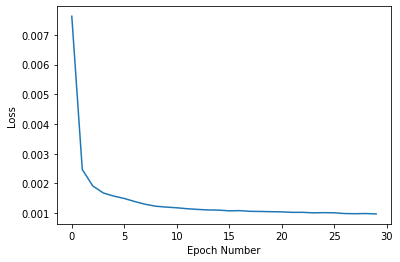

1/1 [==============================] - 0s 17ms/step


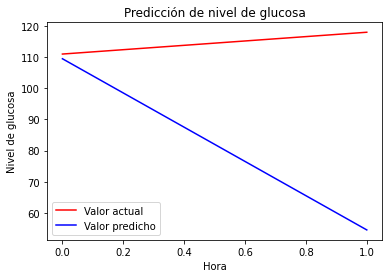

28.298577513835287 44.879060550674694
**********lstmBidirectionalModel**************
Epoch 1/30
1346/1346 [==============================] - 34s 17ms/step - loss: 0.0051
Epoch 2/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0024
Epoch 3/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0019
Epoch 4/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0018
Epoch 5/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0016
Epoch 6/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0015
Epoch 7/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0015
Epoch 8/30
1346/1346 [==============================] - 22s 17ms/step - loss: 0.0014
Epoch 9/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0013
Epoch 10/30
1346/1346 [==============================] - 23s 17ms/step - loss: 0.0012
Epoch 11/30
1346/1346 [==============================] - 23s 17m

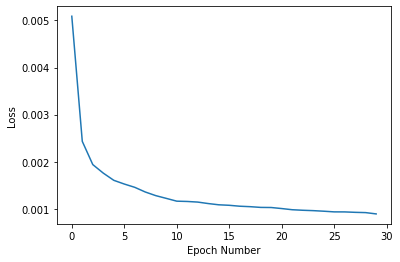

1/1 [==============================] - 0s 19ms/step


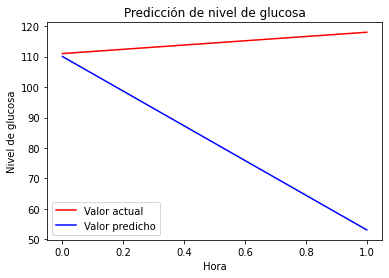

28.681809601118992 45.88253373109946


In [ ]:
training_set = df2LIB193385.iloc[:43079,1:6].values
test_set = df2LIB193385.iloc[43079:,1:6].values

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:4]

X_train = []
y_train = []
WT = 16
WP = 2

for i in range(WT, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WT:i, 0:5])
    y_train.append(training_set_scaled[i,-1])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 5))

lstmMVModel(X_train, y_train,training_set,training_set_scaled,WT,WP)
print('**********lstmBidirectionalModel**************\n')
lstmMVBidirectionalModel(X_train, y_train,training_set,training_set_scaled,WT,WP)